## 1.导入数据

In [103]:
# 导入基本包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [104]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
data.shape

(891, 12)

In [106]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 2.数据探索

In [107]:
# 查看标签

In [108]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [109]:
# 训练集中存活比例
data.Survived.value_counts()[1]/data.Survived.value_counts().sum()

0.3838383838383838

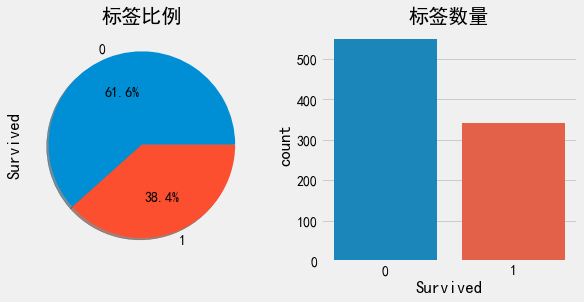

In [110]:
# 标签比例
f,ax = plt.subplots(1,2,figsize = (9,4))
data.Survived.value_counts().plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0])
ax[0].set_title('标签比例')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('标签数量')
plt.show()

训练集中存活比率为38.4%

In [111]:
# 探索Sex与Survived的关系

In [112]:
data['Survived'].groupby(data['Sex']).value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

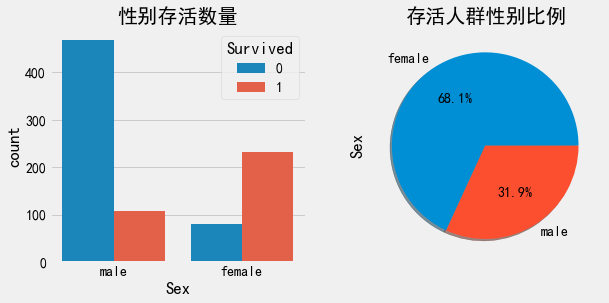

In [113]:
f,ax = plt.subplots(1,2,figsize = (9,4))
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('性别存活数量')
data.groupby(['Survived','Sex'])['Sex'].count()[1].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1])
ax[1].set_title('存活人群性别比例')
plt.show()

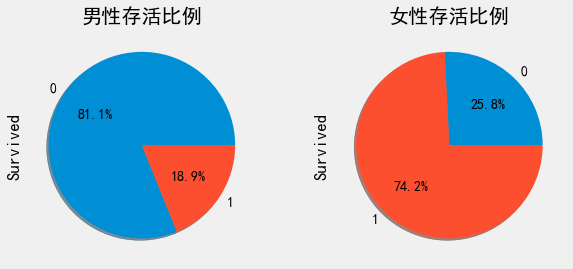

In [114]:
# 男女性别的存活比例
f,ax = plt.subplots(1,2,figsize=(9,4))
data.groupby(['Sex','Survived'])['Survived'].count()['male'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0])
ax[0].set_title('男性存活比例')
data.groupby(['Sex','Survived'])['Survived'].count()['female'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1])
ax[1].set_title('女性存活比例')
plt.show()

训练集中，女性存活率高于男性存活率，在存活的人群中，女性存活率为68.1%，男性存活率为31.9%；训练集中，女性存活比例为74.2%，男性存活比例为18.9%。女性存活比例高由于上救生艇的顺序

In [115]:
data.groupby(['Sex','Survived'])['Survived'].count()['female']

Survived
0     81
1    233
Name: Survived, dtype: int64

In [116]:
# 探索Age与Survived的关系

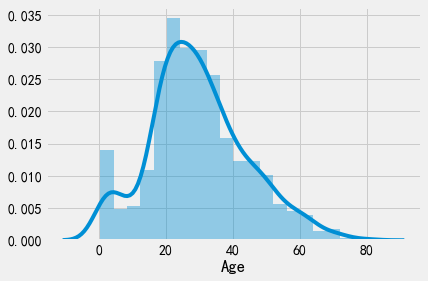

In [117]:
# 查看年龄分布情况
# 由于Age存在缺失值，探索时先删除缺失值的数据
sns.distplot(data.Age.dropna(axis=0))

Text(0, 0.5, 'Density')

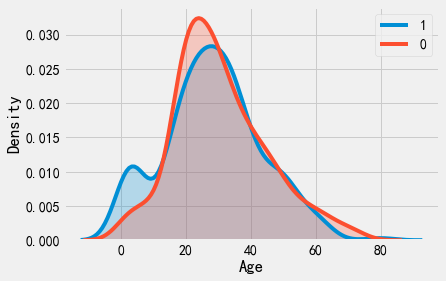

In [118]:
# 查看存活和维存活人群中年龄分布
sns.kdeplot(data.Age[data.Survived==1],label=1,shade=True)
sns.kdeplot(data.Age[data.Survived==0],label=0,shade=True)
plt.xlabel('Age')
plt.ylabel('Density')

总体存活与否与年龄无明显相关，未成年存活比例高于未存活比例，受益于上救生艇的顺序。船舱乘客年龄大部分集中在15-45岁，这个年龄段存活成功与否无较大差异，15-45存活比例高因为这个年龄阶段生存能力强，未存活比例高由于存活成功与否并不与年龄呈完全相关性，可能还与性别、船舱等级等有关需要继续探索

In [119]:
# 探索Plcass与Survived关系

In [120]:
# 利用交叉表探索
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


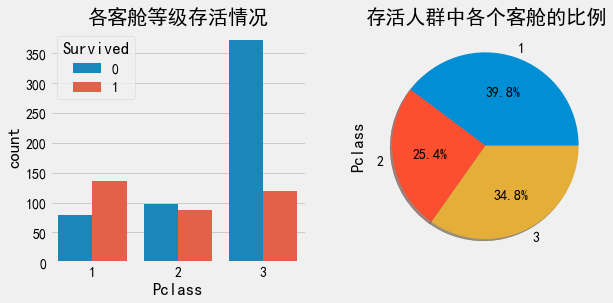

In [121]:
# 利用图表查看比例
f,ax = plt.subplots(1,2,figsize=(9,4))
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('各客舱等级存活情况')
data.groupby(['Survived','Pclass'])['Pclass'].count()[1].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1])
ax[1].set_title('存活人群中各个客舱的比例')
plt.show()

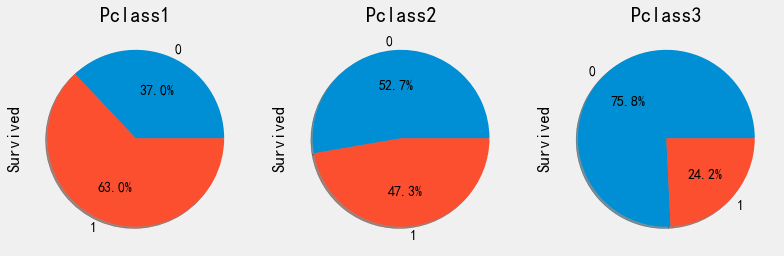

In [122]:
# 计算各客舱中存活比例
f,ax = plt.subplots(1,3,figsize = (12,4))
data.groupby(['Pclass','Survived'])['Survived'].count()[1].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0])
data.groupby(['Pclass','Survived'])['Survived'].count()[2].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1])
data.groupby(['Pclass','Survived'])['Survived'].count()[3].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[2])
ax[0].set_title('Pclass1')
ax[1].set_title('Pclass2')
ax[2].set_title('Pclass3')
plt.show()

存活的人群中1等舱人数比例最大，其次是3等舱和2等舱，但是3等舱人数最多，单独统计各等级舱的生还比例1-3等舱比例分别为63.1%，47.3%，24.2%。加入性别因素查看

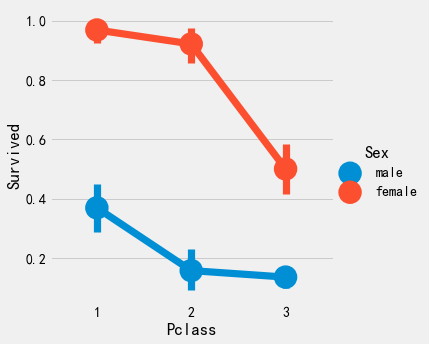

In [123]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

不同客舱等级，女性获救比例都高于男性，同等舱女性获救率超过90%，而三等舱女性获救比例50%作用，不论男性女性头等舱的获救比例都远高于3等舱，可见头等舱有预先登录救生艇的特权与获救大有关系

In [124]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
# 探索Embarked与Survived关系

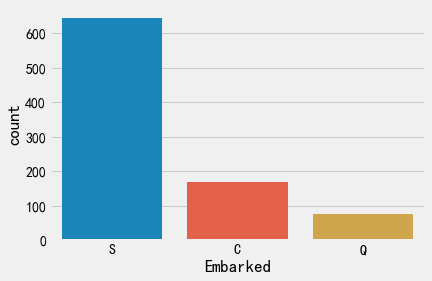

In [126]:
sns.countplot(x='Embarked',data=data)

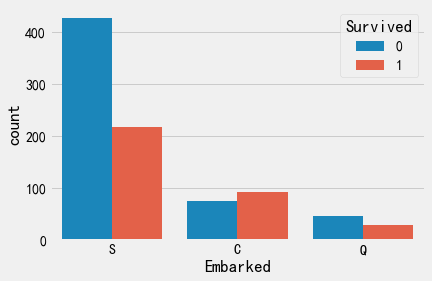

In [127]:
sns.countplot(x='Embarked',hue='Survived',data=data)

同为C口岸登船的乘客获救比例更高，探讨各个口岸登船乘客的性别和客舱等级

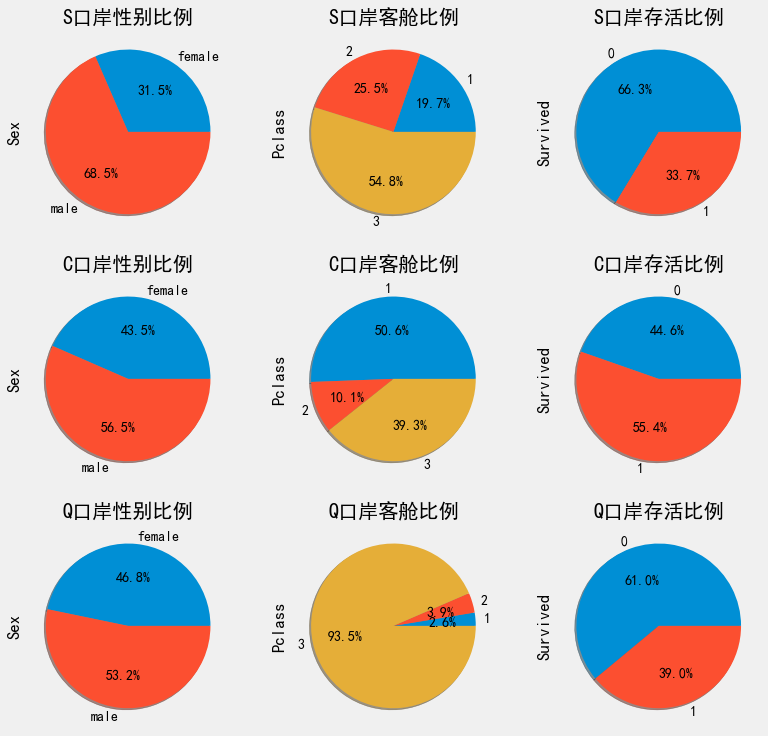

In [128]:
f,ax = plt.subplots(3,3,figsize=(12,12))
data.groupby(['Embarked','Sex'])['Sex'].count()['S'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0][0])
ax[0][0].set_title('S口岸性别比例')
data.groupby(['Embarked','Pclass'])['Pclass'].count()['S'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0][1])
ax[0][1].set_title('S口岸客舱比例')
data.groupby(['Embarked','Survived'])['Survived'].count()['S'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0][2])
ax[0][2].set_title('S口岸存活比例')
data.groupby(['Embarked','Sex'])['Sex'].count()['C'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1][0])
ax[1][0].set_title('C口岸性别比例')
data.groupby(['Embarked','Pclass'])['Pclass'].count()['C'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1][1])
ax[1][1].set_title('C口岸客舱比例')
data.groupby(['Embarked','Survived'])['Survived'].count()['C'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1][2])
ax[1][2].set_title('C口岸存活比例')
data.groupby(['Embarked','Sex'])['Sex'].count()['Q'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[2][0])
ax[2][0].set_title('Q口岸性别比例')
data.groupby(['Embarked','Pclass'])['Pclass'].count()['Q'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[2][1])
ax[2][1].set_title('Q口岸客舱比例')
data.groupby(['Embarked','Survived'])['Survived'].count()['Q'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[2][2])
ax[2][2].set_title('Q口岸存活比例')
plt.show()

可见C口岸存活率高主要得益于C口岸登船的乘客乘坐头等舱的比例较大

In [129]:
# 探索Fare与Survived关系

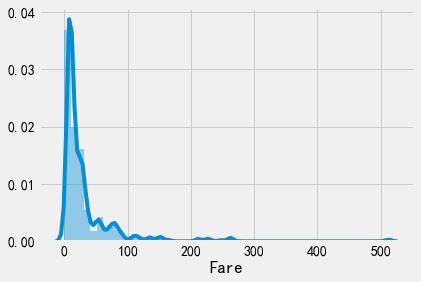

In [130]:
sns.distplot(data.Fare)

Text(0.5, 1.0, 'Pclass3')

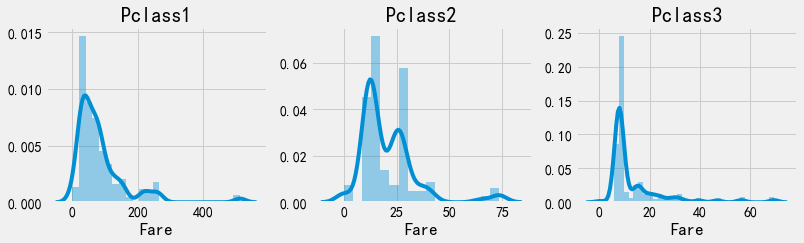

In [131]:
# 不同等级客舱票价分布
f,ax = plt.subplots(1,3,figsize=(12,3))
sns.distplot(data[data.Pclass==1].Fare,ax=ax[0])
sns.distplot(data[data.Pclass==2].Fare,ax=ax[1])
sns.distplot(data[data.Pclass==3].Fare,ax=ax[2])
ax[0].set_title('Pclass1')
ax[1].set_title('Pclass2')
ax[2].set_title('Pclass3')

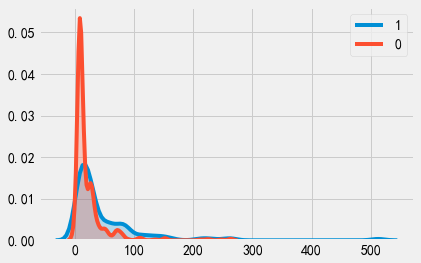

In [132]:
# 查看票价与存活与否的比例
sns.kdeplot(data[data.Survived==1].Fare,label='1',shade=True)
sns.kdeplot(data[data.Survived==0].Fare,label='0',shade=True)

票价高的获救存活比例高于票价低的

In [133]:
# 结合SibSp和Parch，探索同乘存在父母兄弟子女与否与Survived关系

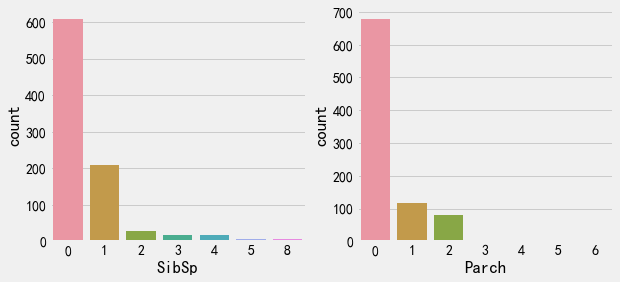

In [134]:
# 乘客SibSp计数统计
f,ax = plt.subplots(1,2,figsize=(9,4))
sns.countplot(x='SibSp',data=data,ax=ax[0])
sns.countplot(x='Parch',data=data,ax=ax[1])
plt.show()

In [135]:
# 建立新字段sibsp和parch区分是否有同乘的亲人
data.loc[data.SibSp==0,'sibsp'] = 'no_sibsp'
data.loc[data.SibSp!=0,'sibsp'] = 'sibsp'
data.loc[data.Parch==0,'parch'] = 'no_parch'
data.loc[data.Parch!=0,'parch'] = 'parch'

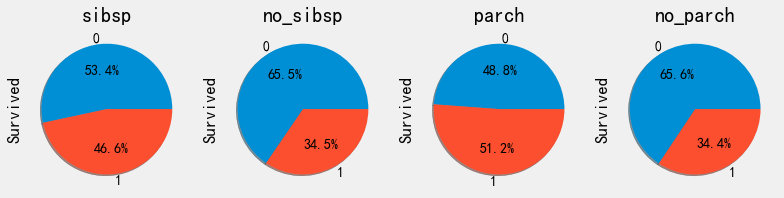

In [136]:
# 查看同乘是否存在亲人与获救的关系
f,ax = plt.subplots(1,4,figsize=(12,3))
data.groupby(['sibsp','Survived'])['Survived'].count()['sibsp'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[0])
data.groupby(['sibsp','Survived'])['Survived'].count()['no_sibsp'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[1])
data.groupby(['parch','Survived'])['Survived'].count()['parch'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[2])
data.groupby(['parch','Survived'])['Survived'].count()['no_parch'].plot.pie(autopct='%.1f%%',shadow=True,ax=ax[3])
ax[0].set_title('sibsp')
ax[1].set_title('no_sibsp')
ax[2].set_title('parch')
ax[3].set_title('no_parch')
plt.show()

同乘中有亲人的存活比例高于同乘中没有亲人的乘客

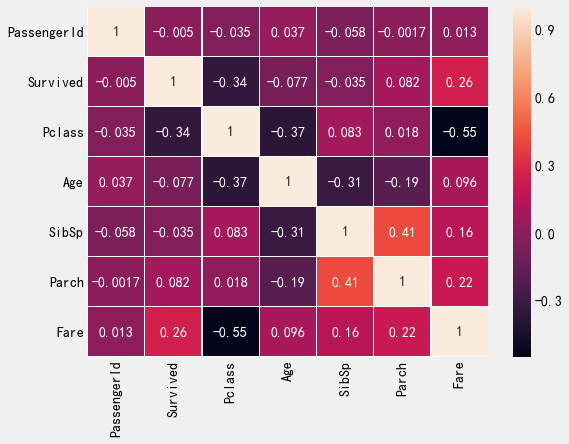

In [137]:
# 利用热图分析连续变量间的相关系数
sns.heatmap(data.corr(),annot=True,linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

##### 通过上述分析可得：
##### 1.存活与性别相关，女性乘客的存活率高于男性
##### 2.大部分未成年乘客获救存活
##### 3.存活与乘坐的客舱等级相关，头等舱乘客的存活比例远大于3等舱，票价越高存活比例越大
##### 4.同乘有亲人的常客存活的比例高于同乘未有亲人的乘客

## 3.数据清洗及预处理

In [138]:
# 导入原始训练集和测试集数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [139]:
print(train.shape,test.shape)

(891, 12) (418, 11)


### 3.1缺失值处理

In [140]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [141]:
test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [142]:
# Age缺失值处理

In [143]:
# 根据Name提取乘客标签
train['initial'] = train.Name.str.extract('([A-Za-z]+)\.')
test['initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [144]:
train['initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Capt          1
Don           1
Mme           1
Jonkheer      1
Sir           1
Lady          1
Ms            1
Name: initial, dtype: int64

In [145]:
train_re = []
for i in train['initial'].values:
    if (i!='Mr') and (i!='Miss') and (i!='Mrs') and (i!='Master'):
        train_re.append(i.replace(i,'other'))
    else:
        train_re.append(i)
        
test_re = []
for i in test['initial'].values:
    if (i!='Mr') and (i!='Miss') and (i!='Mrs') and (i!='Master'):
        test_re.append(i.replace(i,'other'))
    else:
        test_re.append(i)
        
train['Re'] = train_re
test['Re'] = test_re

In [146]:
for i in train.Re.values:
    train.loc[(train.Age.isnull())&(train.Re==i),'Age'] = int(train.groupby('Re')['Age'].mean()[i])
    

In [147]:
for i in test.Re.values:
    test.loc[(test.Age.isnull())&(test.Re==i),'Age'] = int(test.groupby('Re')['Age'].mean()[i])

In [148]:
print(train.Age.isnull().sum(),test.Age.isnull().sum())

0 0


In [149]:
# Fare缺失值处理

In [150]:
for i in test.Pclass.values:
    test.loc[(test.Fare.isnull())&(test.Pclass==i),'Fare'] = float(test.groupby('Pclass')['Fare'].mean()[i])

In [151]:
test.Fare.isnull().mean()

0.0

In [152]:
# Cabin缺失值处理

In [153]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
F2             3
E101           3
D              3
B49            2
E24            2
C65            2
E67            2
C126           2
E33            2
F G73          2
C123           2
C2             2
C78            2
C92            2
E44            2
B35            2
D20            2
C68            2
B77            2
E121           2
B22            2
B20            2
D26            2
C124           2
B18            2
              ..
B38            1
C118           1
A6             1
D6             1
A31            1
A14            1
D19            1
E46            1
B19            1
C87            1
B94            1
E77            1
D9             1
A5             1
B78            1
E17            1
E38            1
D21            1
C47            1
C49            1
A36            1
B41            1
D37            1
C104           1
B30            1
A32            1
D46            1
C106          

In [154]:
# 船舱等级携带的信息完全可以代替，并且缺失值过多，可以删除

In [155]:
del train['Cabin']
del test['Cabin']

In [156]:
# Embarked缺失值处理

In [157]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [158]:
# 利用众数填充，填充为S
train.Embarked.fillna('S',inplace=True)

In [159]:
train.Embarked.isnull().sum()

0

In [160]:
train.isnull().sum().sum()

0

In [161]:
test.isnull().sum().sum()

0

### 3.2数据预处理

In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,initial,Re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Mr


In [163]:
# 对Age进行分箱

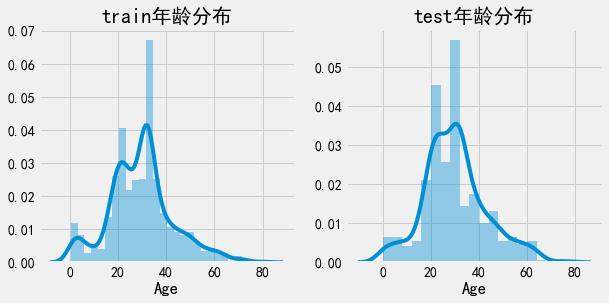

In [164]:
f,ax = plt.subplots(1,2,figsize=(9,4))
sns.distplot(train.Age,ax=ax[0])
sns.distplot(test.Age,ax=ax[1])
ax[0].set_title('train年龄分布')
ax[1].set_title('test年龄分布')
plt.show()

In [165]:
train.loc[train.Age<16,'Age_band'] = 0
train.loc[(train.Age>=16)&(train.Age<32),'Age_band'] = 1
train.loc[(train.Age>=32)&(train.Age<48),'Age_band'] = 2
train.loc[(train.Age>=48)&(train.Age<65),'Age_band'] = 3
train.loc[train.Age>=65,'Age_band'] = 4

In [166]:
test.loc[test.Age<16,'Age_band'] = 0
test.loc[(test.Age>=16)&(test.Age<32),'Age_band'] = 1
test.loc[(test.Age>=32)&(test.Age<48),'Age_band'] = 2
test.loc[(test.Age>=48)&(test.Age<65),'Age_band'] = 3
test.loc[test.Age>=65,'Age_band'] = 4

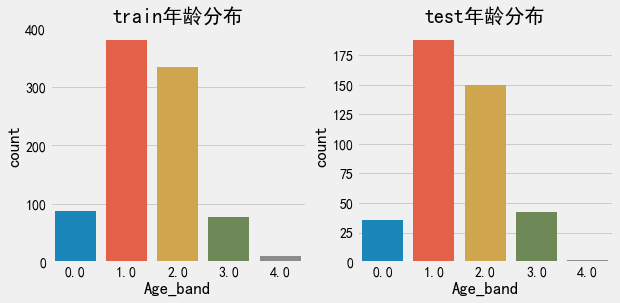

In [167]:
f,ax = plt.subplots(1,2,figsize=(9,4))
sns.countplot('Age_band',data=train,ax=ax[0])
sns.countplot('Age_band',data=test,ax=ax[1])
ax[0].set_title('train年龄分布')
ax[1].set_title('test年龄分布')
plt.show()

In [168]:
# 删除无关列

In [169]:
train.drop(['PassengerId','Name','Age','Ticket','initial'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Age','Ticket','initial'],axis=1,inplace=True)

In [170]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Re,Age_band
0,0,3,male,1,0,7.2500,S,Mr,1.0
1,1,1,female,1,0,71.2833,C,Mrs,2.0
2,1,3,female,0,0,7.9250,S,Miss,1.0
3,1,1,female,1,0,53.1000,S,Mrs,2.0
4,0,3,male,0,0,8.0500,S,Mr,2.0


In [171]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Re,Age_band
0,3,male,0,0,7.8292,Q,Mr,2.0
1,3,female,1,0,7.0000,S,Mrs,2.0
2,2,male,0,0,9.6875,Q,Mr,3.0
3,3,male,0,0,8.6625,S,Mr,1.0
4,3,female,1,1,12.2875,S,Mrs,1.0


In [172]:
# 对Fare进行标准化

In [173]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train['Fare'] = ss.fit_transform(train['Fare'].values.reshape(-1,1))
test['Fare'] = ss.fit_transform(test['Fare'].values.reshape(-1,1))

In [174]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Re,Age_band
0,0,3,male,1,0,-0.502445,S,Mr,1.0
1,1,1,female,1,0,0.786845,C,Mrs,2.0
2,1,3,female,0,0,-0.488854,S,Miss,1.0
3,1,1,female,1,0,0.420730,S,Mrs,2.0
4,0,3,male,0,0,-0.486337,S,Mr,2.0


In [175]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Re,Age_band
0,3,male,0,0,-0.497311,Q,Mr,2.0
1,3,female,1,0,-0.512175,S,Mrs,2.0
2,2,male,0,0,-0.463999,Q,Mr,3.0
3,3,male,0,0,-0.482373,S,Mr,1.0
4,3,female,1,1,-0.417392,S,Mrs,1.0


In [176]:
# 对Sex Embareked Re三个变量进行编码

In [177]:
col = ['Sex','Embarked','Re']

In [178]:
from sklearn.preprocessing import OrdinalEncoder

In [179]:
oe = OrdinalEncoder()
train.loc[:,col] = oe.fit_transform(train.loc[:,col])
test.loc[:,col] = oe.fit_transform(test.loc[:,col])

In [180]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Re,Age_band
0,0,3,1.0,1,0,-0.502445,2.0,2.0,1.0
1,1,1,0.0,1,0,0.786845,0.0,3.0,2.0
2,1,3,0.0,0,0,-0.488854,2.0,1.0,1.0
3,1,1,0.0,1,0,0.420730,2.0,3.0,2.0
4,0,3,1.0,0,0,-0.486337,2.0,2.0,2.0


In [181]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Re,Age_band
0,3,1.0,0,0,-0.497311,1.0,2.0,2.0
1,3,0.0,1,0,-0.512175,2.0,3.0,2.0
2,2,1.0,0,0,-0.463999,1.0,2.0,3.0
3,3,1.0,0,0,-0.482373,2.0,2.0,1.0
4,3,0.0,1,1,-0.417392,2.0,3.0,1.0


## 4.模型建立及评估

In [182]:
# 划分特征和标签

In [183]:
X = train.iloc[:,1:]
y = train.iloc[:,1]

In [184]:
print(X.shape,y.shape)

(891, 8) (891,)


In [185]:
# 划分数据集

##### 由于需要预测的测试集无标签，所以先在训练集中进行划分

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

In [188]:
print(Xtrain.shape,Xtest.shape)

(623, 8) (268, 8)


In [189]:
# 基于逻辑回归

In [190]:
from sklearn.linear_model import LogisticRegression as LR

In [191]:
l = LR()
l = l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

0.9477611940298507

In [192]:
# 基于KNN

In [193]:
from sklearn.neighbors import KNeighborsClassifier

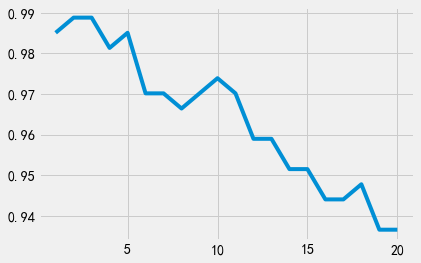

In [194]:
krange = range(1,21)
score = []
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
plt.plot(krange,score)
plt.show()

In [195]:
max(score)

0.9888059701492538

In [196]:
score.index(max(score))+1

2

In [197]:
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9850746268656716

In [198]:
# 基于决策树

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
from sklearn.model_selection import GridSearchCV

# 设置可选参数
param_grid = {'criterion':['gini','entropy'],
              'max_depth':range(2,10),
              'min_samples_leaf':range(1,10),
              'min_samples_split':range(2,10)}

# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR = GR.fit(Xtrain,Ytrain)

In [201]:
# 输出接口
GR.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [202]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=2)
DTC = DTC.fit(Xtrain,Ytrain)
DTC.score(Xtest,Ytest)

1.0